<b>Forecast the Airlines Data. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
data = pd.read_excel(r'D:\Excelr Data Science assignment\Forecasting\Airlines+Data.xlsx',sheet_name='Sheet1')

In [3]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<b>EDA

In [4]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [7]:
data.rename(columns={'Passengers': 'P','Month':'Date'},inplace=True)
data.head()

,Date,P
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [8]:
data.set_index('Date',inplace=True)
data

,P
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [9]:
data_2 = pd.read_excel(r'D:\Excelr Data Science assignment\Forecasting\Airlines+Data.xlsx',sheet_name='Sheet1')

In [10]:
data_2.rename(columns={'Passengers': 'P','Month':'Date'},inplace=True)
data_2['Date'] = pd.to_datetime(data_2['Date'],format='%b-%y')
data_2['Month'] = data_2['Date'].dt.strftime('%b')
data_2['Year'] = data_2['Date'].dt.strftime('%y')
data_2

,Date,P,Month,Year
0,1995-01-01,112,Jan,95
1,1995-02-01,118,Feb,95
2,1995-03-01,132,Mar,95
3,1995-04-01,129,Apr,95
4,1995-05-01,121,May,95
...,...,...,...,...
91,2002-08-01,405,Aug,02
92,2002-09-01,355,Sep,02
93,2002-10-01,306,Oct,02
94,2002-11-01,271,Nov,02


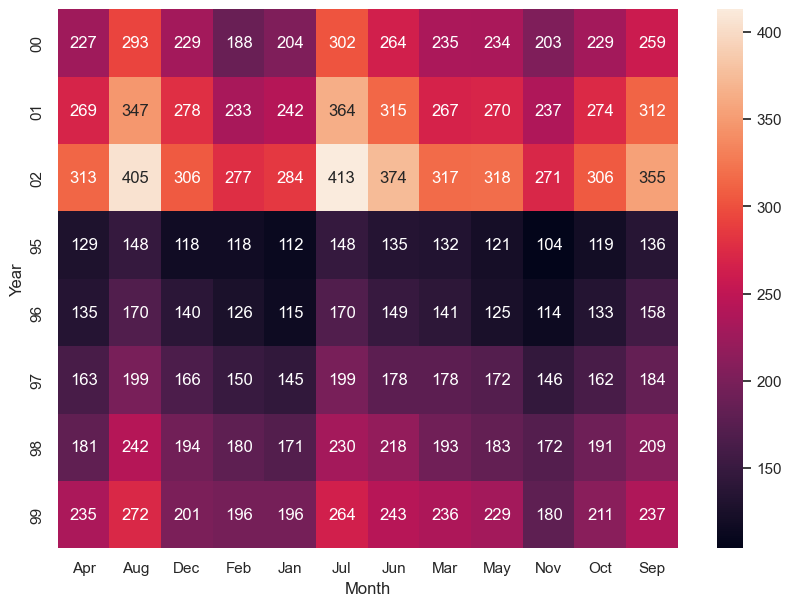

In [11]:
d_p = pd.pivot_table(data_2,values='P',index='Year',columns='Month',aggfunc='mean',fill_value=0)
plt.figure(figsize=(10,7))
sns.heatmap(d_p,annot=True,fmt='g')
plt.show()

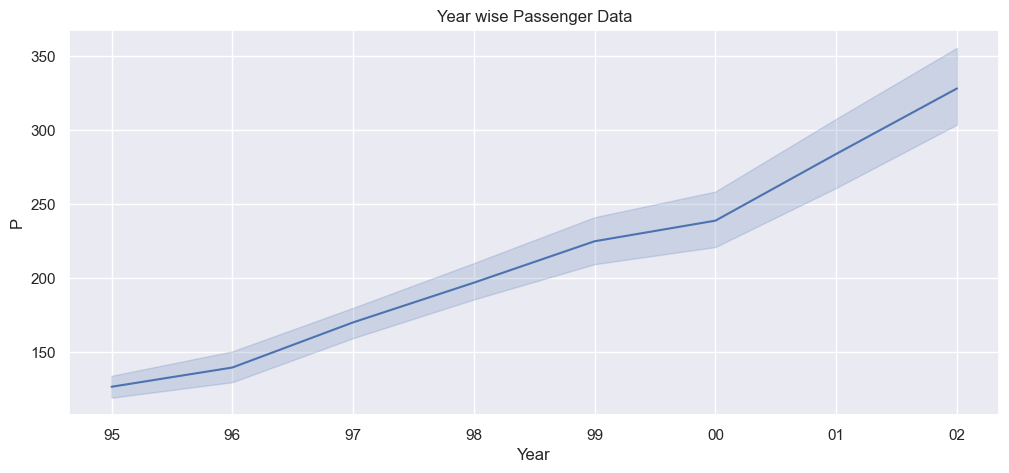

In [12]:
plt.figure(figsize=(12,5))
sns.lineplot(data_2,x='Year',y='P')
plt.title('Year wise Passenger Data')
plt.show()

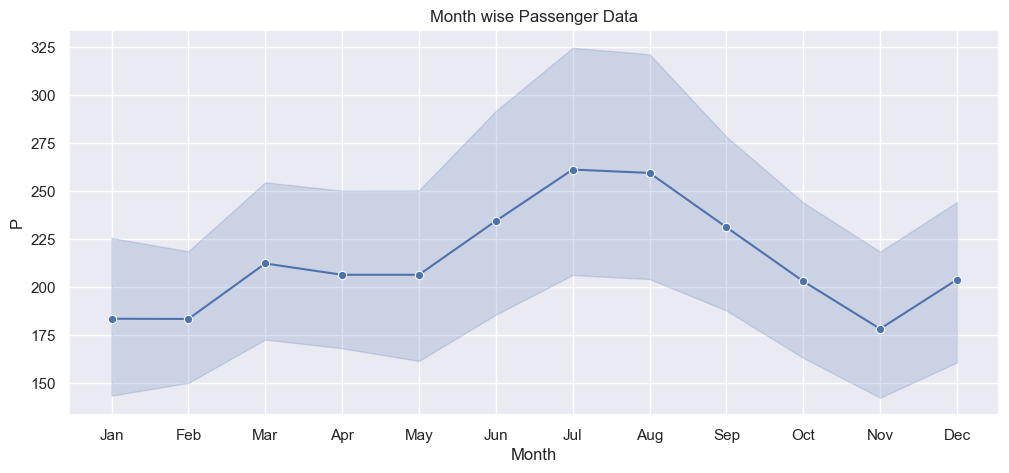

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(data_2,x='Month',y='P',marker='o')
plt.title('Month wise Passenger Data')
plt.show()

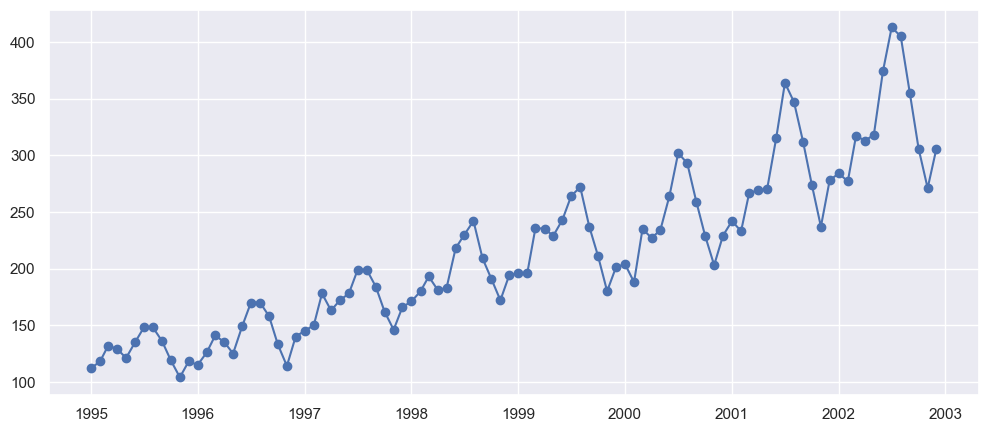

In [14]:
plt.figure(figsize=(12,5))
plt.plot(data['P'],marker='o')
plt.show()

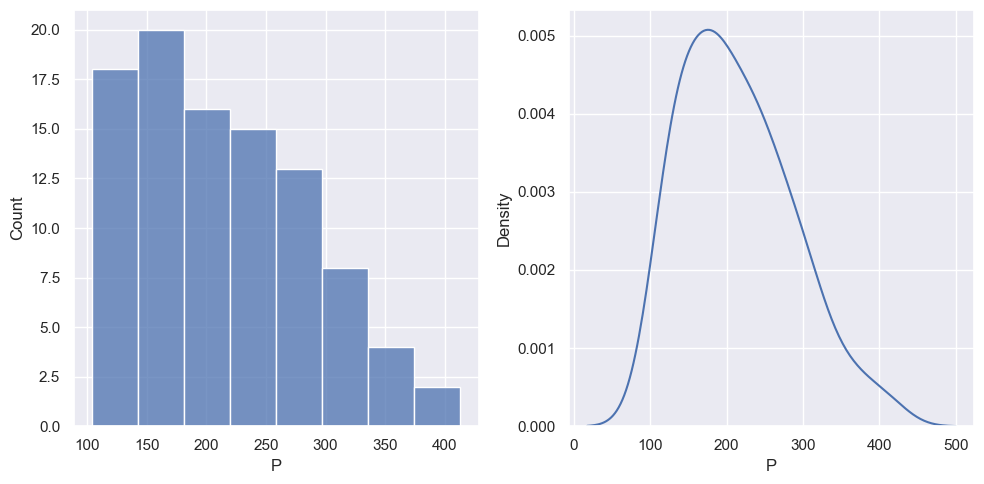

In [15]:
fig , ax = plt.subplots(figsize=(10,5),ncols=2)
sns.histplot(data['P'],ax=ax[0])
sns.kdeplot(data['P'],ax=ax[1])
plt.tight_layout()
plt.show()

<Axes: xlabel='Month', ylabel='P'>

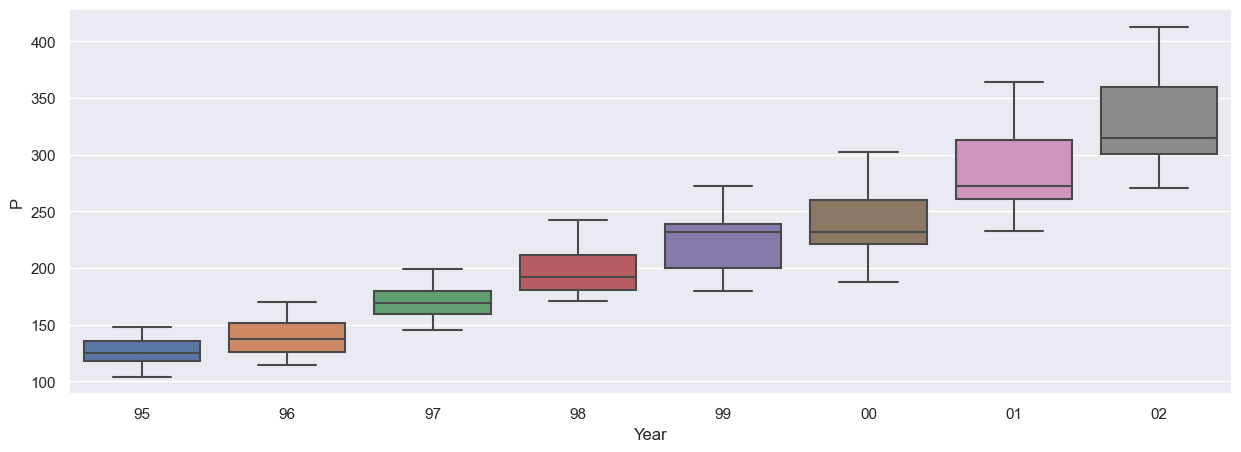

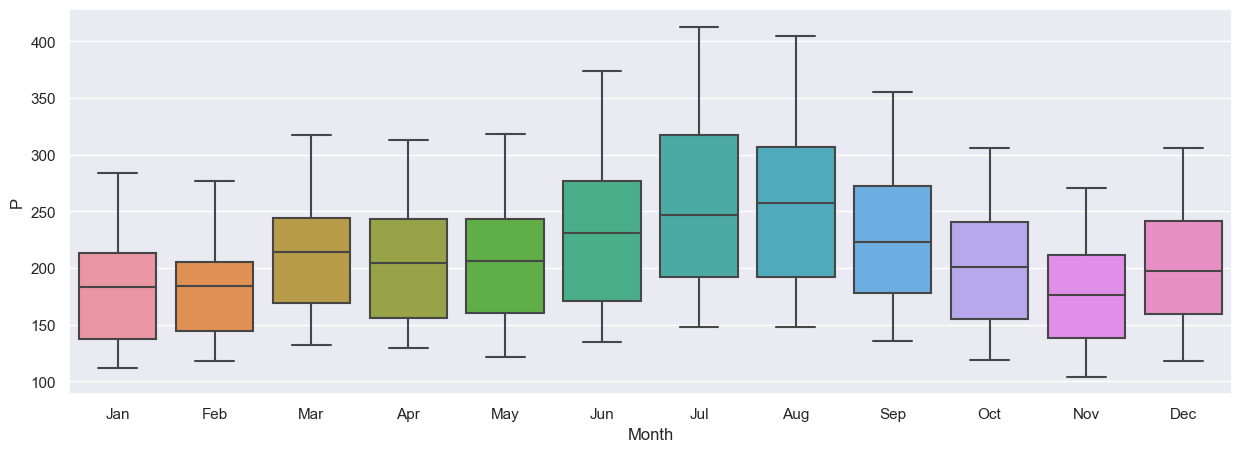

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data_2,x='Year',y='P')
plt.figure(figsize=(15,5))
sns.boxplot(data_2,x='Month',y='P')

<b>No of passengers fly is increasing per year and most no of passengers fly in the month of July followed by August

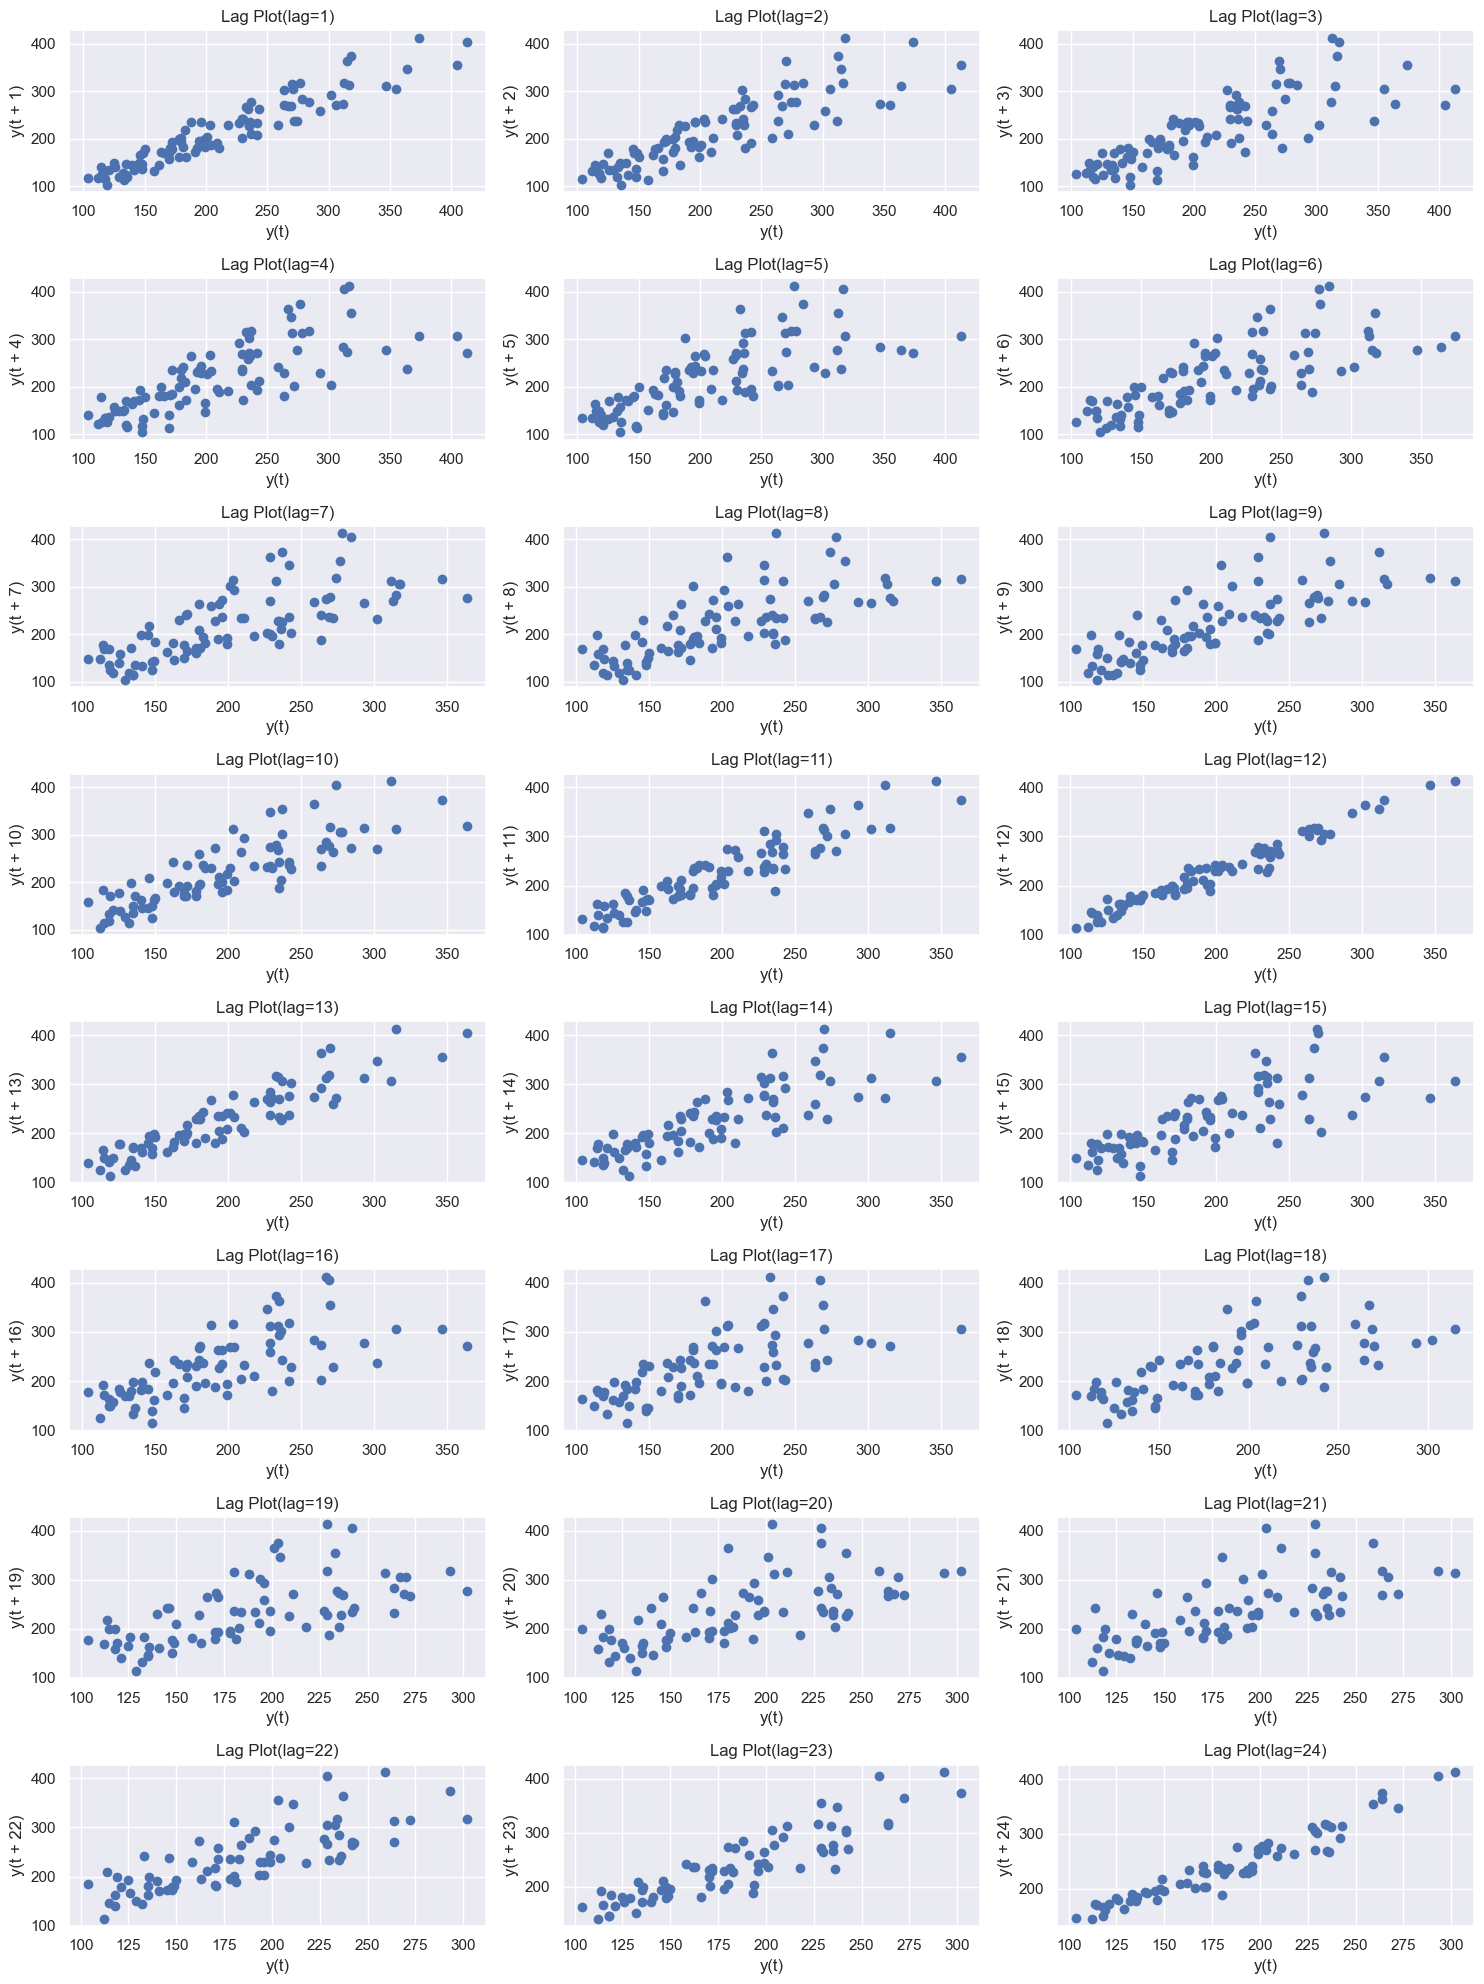

In [17]:
from pandas.plotting import lag_plot
plt.figure(figsize=(15,20))
for i , lag in enumerate(range(1,25),start=1):
    plt.subplot(8,3,i)
    lag_plot(data['P'],lag=lag)
    plt.title(f'Lag Plot(lag={lag})')
plt.tight_layout()
plt.show()

<b>Signs of auto correlation at lags 1,11,12,13,24

In [18]:
#ACF and PACF Plots
import statsmodels.graphics.tsaplots as tsa_plots

D:\Anaconda\Installation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


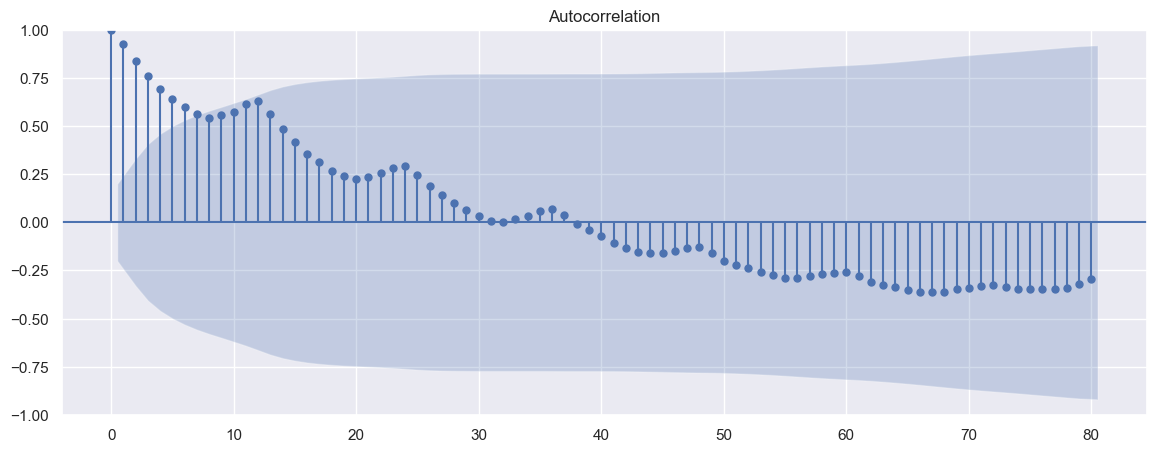

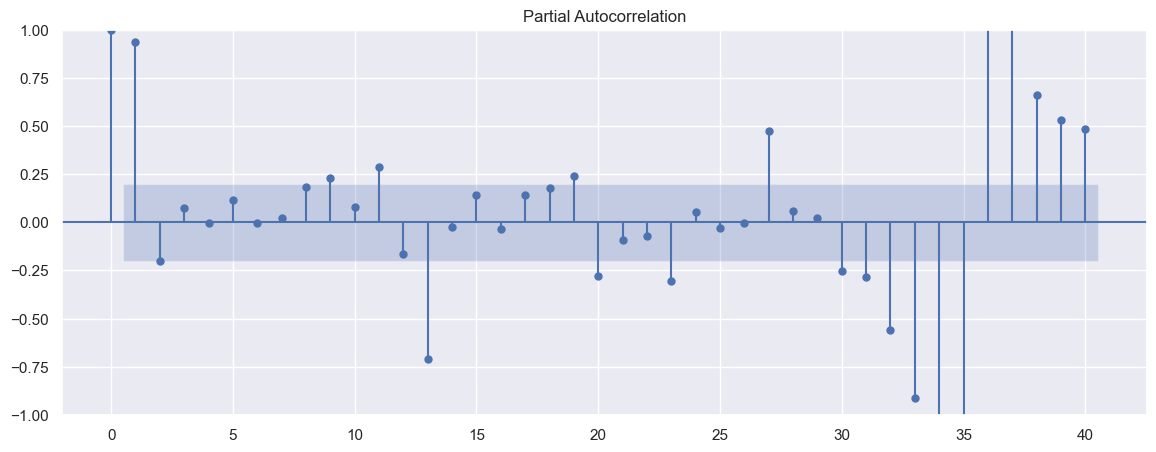

In [19]:
with plt.rc_context():
    plt.rc('figure',figsize=(14,5))
    tsa_plots.plot_acf(data['P'],lags=80)
    plt.rc('figure',figsize=(14,5))
    tsa_plots.plot_pacf(data['P'],lags=40)
    plt.show()

<b>From ACF : Significant auto correlation till lag 6<br>
<b>Presence of seasonality is clear<br>
<b>From PACF : Higher partial autocorrelation while lag increases

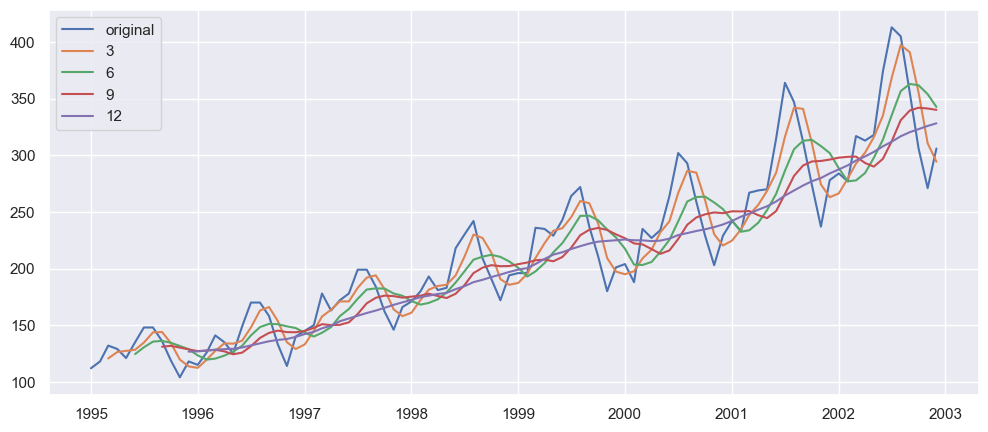

In [20]:
#Moving Averagw Plot
plt.figure(figsize=(12,5))
plt.plot(data['P'],label='original')
for i in range(3,13,3):
    plt.plot(data['P'].rolling(i).mean(),label=str(i))
plt.legend(loc='best')
plt.show()

<b>Decomposition

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

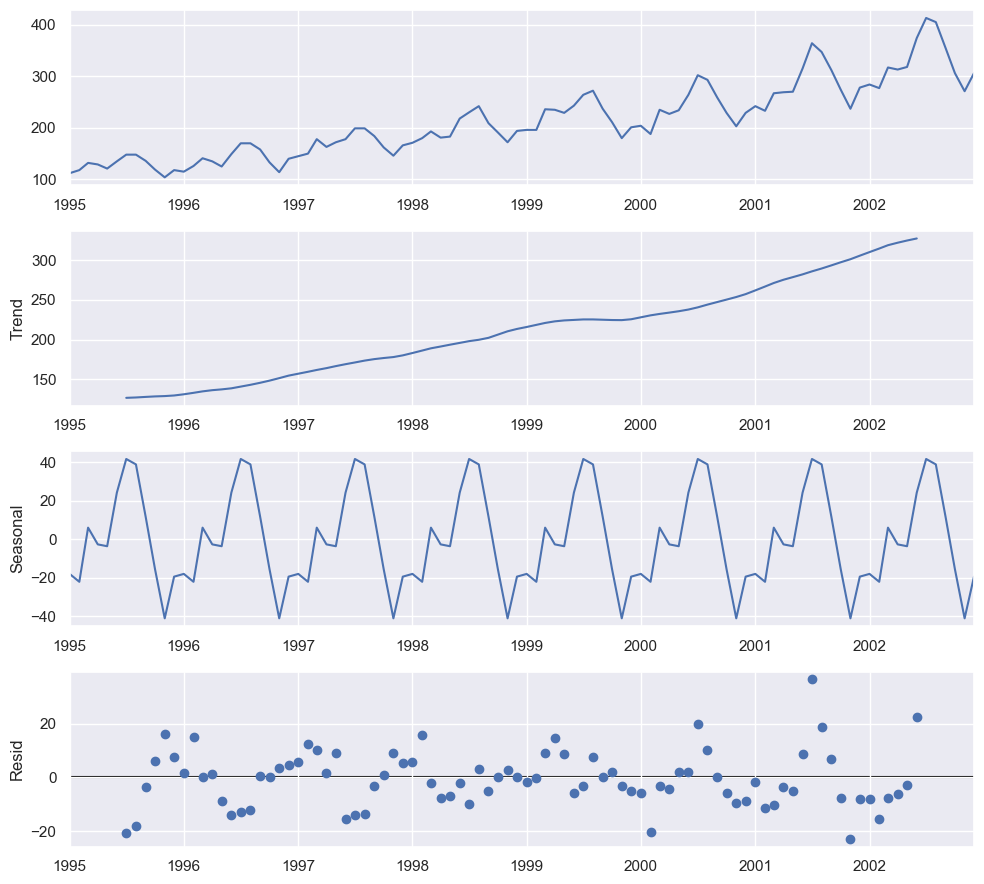

In [22]:
#Additive 
decompose = seasonal_decompose(data,period=12,model='add')
plt.rc('figure',figsize=(10,9))
decompose.plot()
plt.show()

<b>Uptrending<br>
<b>Seasonal:Variation from -40 to 40<br>
<b>precence of white noise

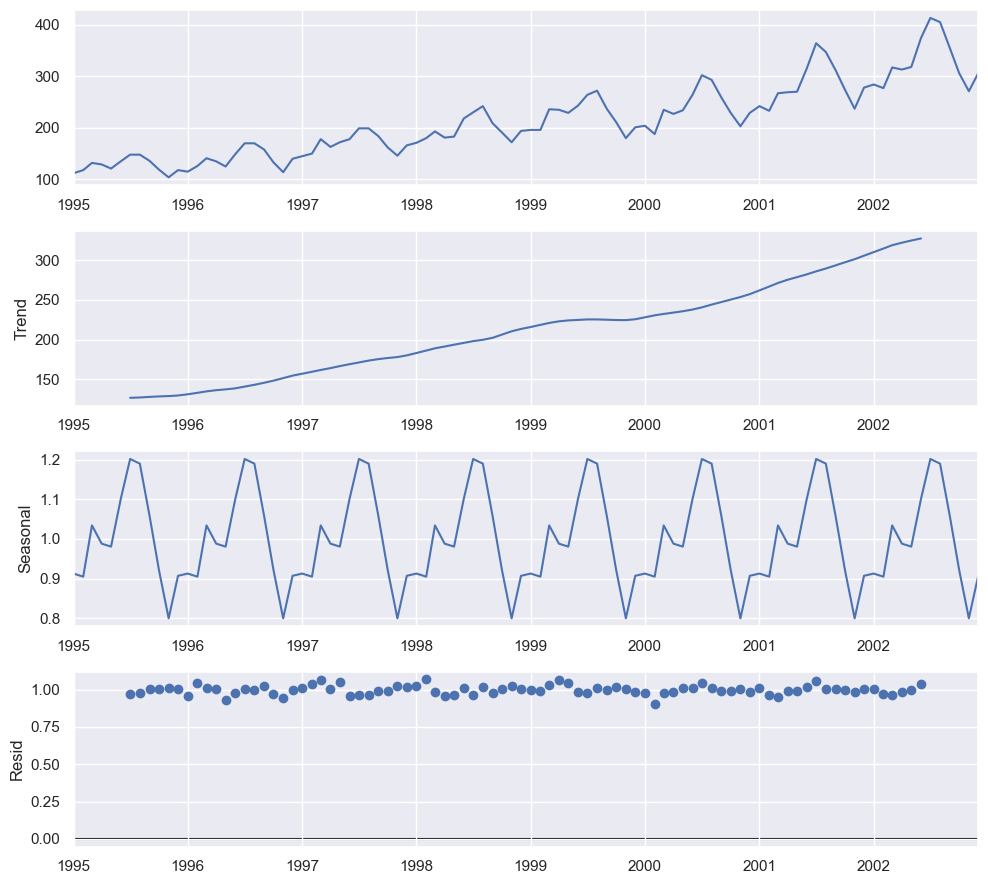

In [23]:
#Multiplicative
decompose_2 = seasonal_decompose(data,period=12,model='mul')
plt.rc('figure',figsize=(10,9))
decompose_2.plot()
plt.show()

<b>Up trending<br>
<b>Seasonal variation within 8 and 1.2

In [24]:
#split the Data
data.shape

(96, 1)

In [25]:
data_train = data[:84]
data_test = data[84:]

<b>MODEL BUILDING

In [26]:
def MAPE(ori,pred):
    mape = np.abs((pred-ori)/ori)*100
    return np.mean(mape)

In [27]:
#Model 1 SImple Exponential Model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
from sklearn.metrics import mean_squared_error as MSE

In [28]:
model_1 = SES(data_train).fit(optimized=True)
pred_1 = model_1.forecast(12)
print(pred_1.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_1)),'\n','MAPE :',MAPE(data_test['P'],pred_1))

(12,)
RMSE : 68.0067403134932 
 MAPE : 14.235433154627307


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


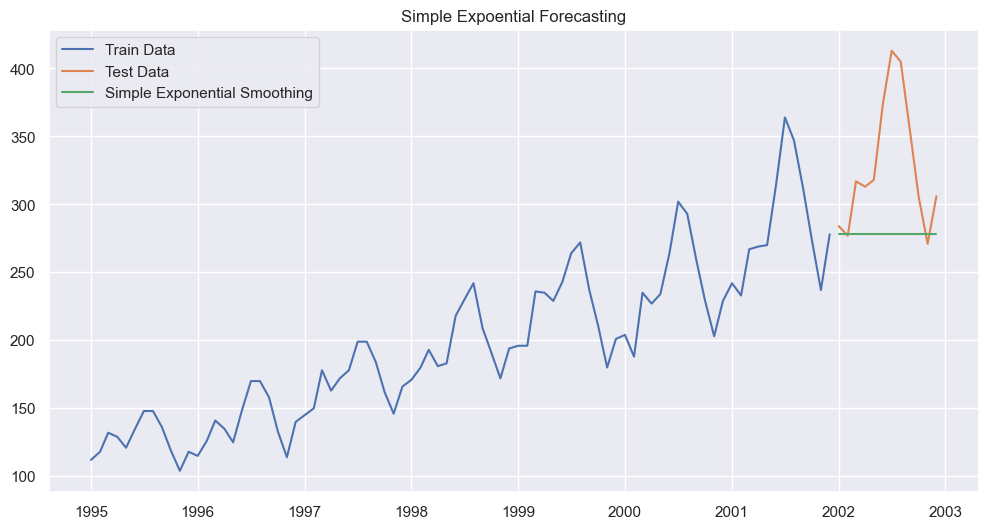

In [29]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_1,label='Simple Exponential Smoothing')
plt.title('Simple Expoential Forecasting')
plt.legend(loc='best')
plt.show()

In [30]:
#Model 2 Holts method double Exponential Model
from statsmodels.tsa.holtwinters import Holt
model_2 = Holt(data_train).fit(optimized=True)
pred_2 = model_2.forecast(12)
print(pred_2.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_2)),'\n','MAPE :',MAPE(data_test['P'],pred_2))

(12,)
RMSE : 58.57971709837436 
 MAPE : 11.840939401160533


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


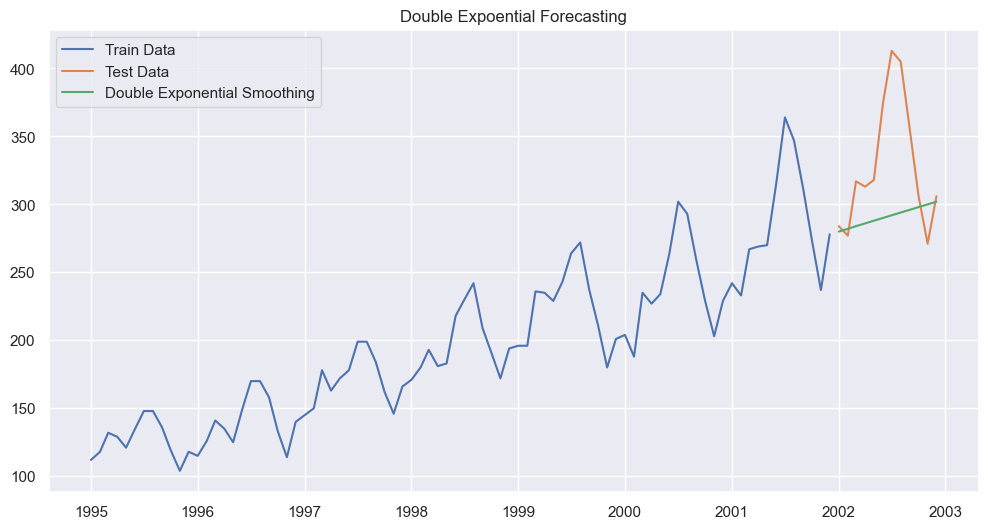

In [31]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_2,label='Double Exponential Smoothing')
plt.title('Double Expoential Forecasting')
plt.legend(loc='best')
plt.show()

In [32]:
#Model 3 Holt Winters method Triple Exponential Model-------#Seasonality='add',trend='add'
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
model_3 = ES(data_train,seasonal='add',trend='add',seasonal_periods=12).fit(optimized=True)
pred_3 = model_3.forecast(12)
print(pred_3.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_3)),'\n','MAPE :',MAPE(data_test['P'],pred_3))

(12,)
RMSE : 29.589128552551102 
 MAPE : 5.730286880515042


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


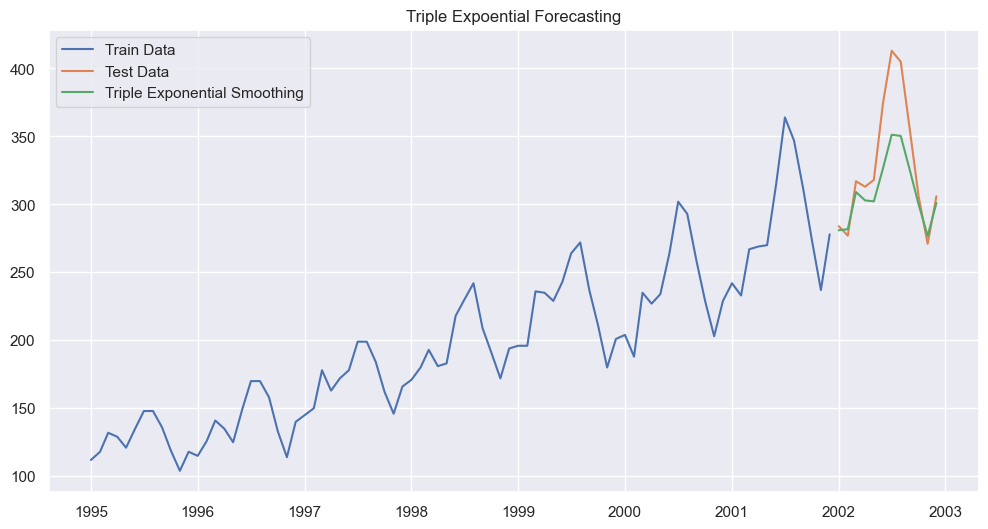

In [33]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_3,label='Triple Exponential Smoothing')
plt.title('Triple Expoential Forecasting')
plt.legend(loc='best')
plt.show()

In [34]:
#Model 4 Holt Winters method Triple Exponential Model-------#Seasonality='mul',trend='mul'
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
model_4 = ES(data_train,seasonal='mul',trend='mul',seasonal_periods=12).fit(optimized=True)
pred_4 = model_4.forecast(12)
print(pred_4.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_4)),'\n','MAPE :',MAPE(data_test['P'],pred_4))

(12,)
RMSE : 7.756771529576427 
 MAPE : 1.9395725316157677


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


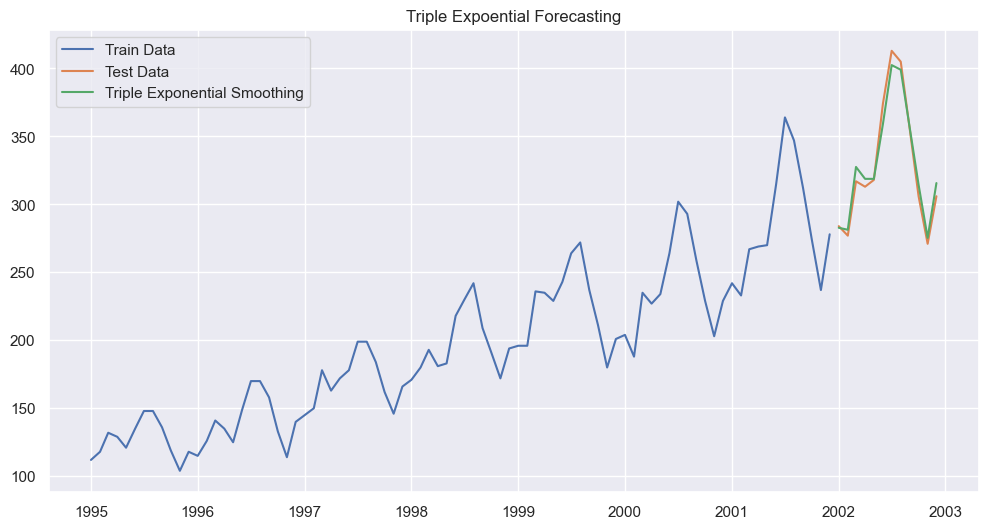

In [35]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_4,label='Triple Exponential Smoothing')
plt.title('Triple Expoential Forecasting')
plt.legend(loc='best')
plt.show()

In [36]:
#Model 5 Holt Winters method Triple Exponential Model-------#Seasonality='add',trend='mul'
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
model_5 = ES(data_train,seasonal='add',trend='mul',seasonal_periods=12).fit(optimized=True)
pred_5 = model_5.forecast(12)
print(pred_5.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_5)),'\n','MAPE :',MAPE(data_test['P'],pred_5))

(12,)
RMSE : 26.06108294775798 
 MAPE : 5.169219309209746


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


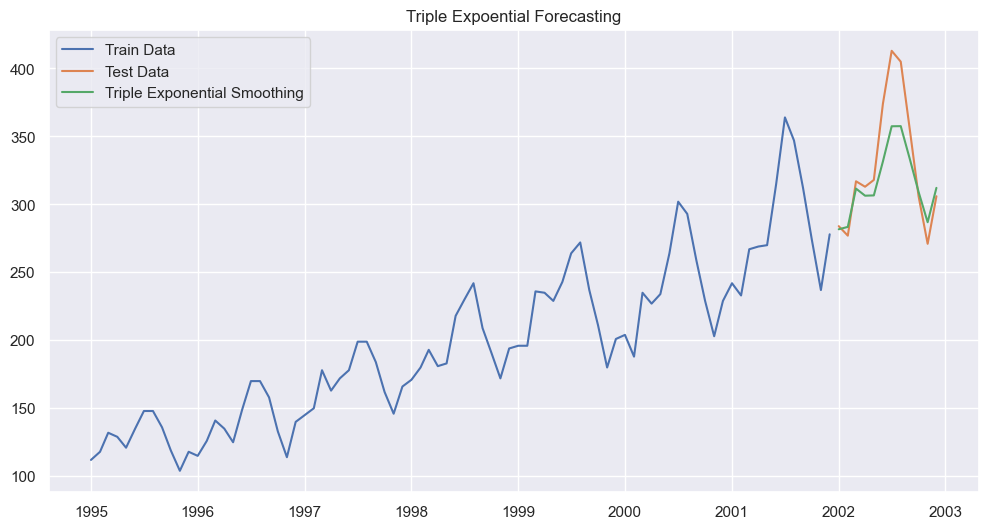

In [37]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_5,label='Triple Exponential Smoothing')
plt.title('Triple Expoential Forecasting')
plt.legend(loc='best')
plt.show()

In [38]:
#Model 6 Holt Winters method Triple Exponential Model-------#Seasonality='mul',trend='add'
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES
model_6 = ES(data_train,seasonal='mul',trend='add',seasonal_periods=12).fit(optimized=True)
pred_6 = model_6.forecast(12)
print(pred_6.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_6)),'\n','MAPE :',MAPE(data_test['P'],pred_6))

(12,)
RMSE : 12.920910103618885 
 MAPE : 2.8210913424868784


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


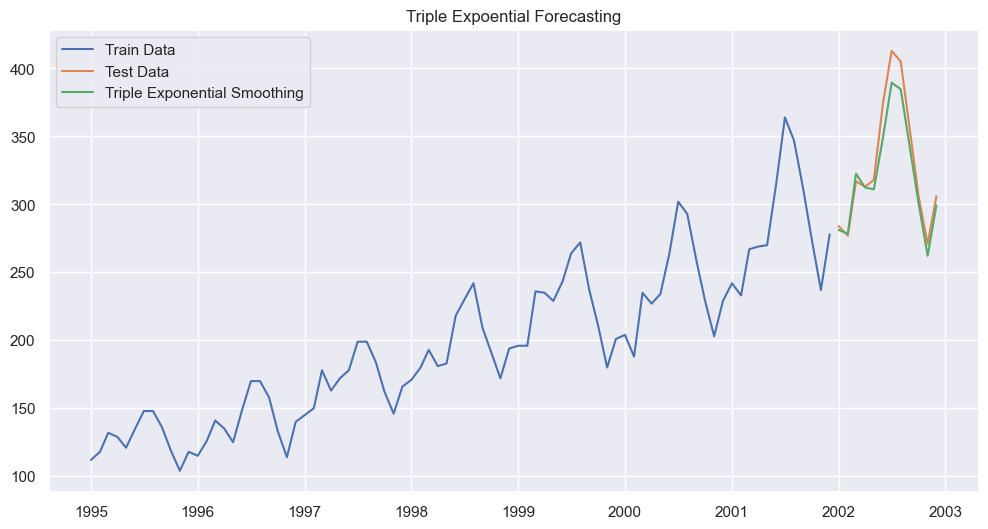

In [39]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_6,label='Triple Exponential Smoothing')
plt.title('Triple Expoential Forecasting')
plt.legend(loc='best')
plt.show()

<b>Therefore,seasonal='mul',trend='mul'

<b><h3>ARIMA

In [40]:
#Adfuller method
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_train)
print('p_value',adf_test[1])

p_value 0.9939015526143222


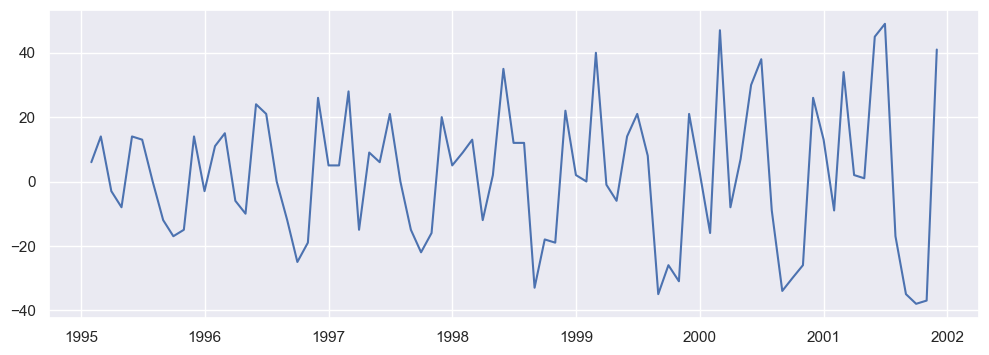

In [41]:
data_train_diff = data_train.diff().dropna()
plt.figure(figsize=(12,4))
plt.plot(data_train_diff)

In [42]:
adf_test_2 = adfuller(data_train_diff)
print('p_value',adf_test_2[1])

p_value 0.3360393021041872


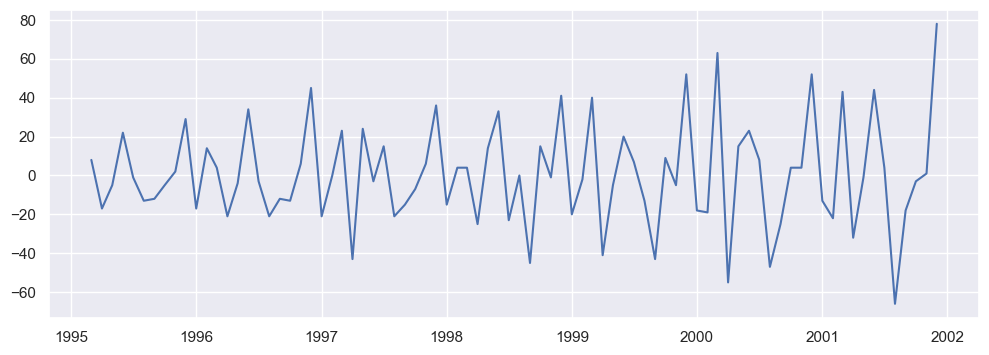

In [43]:
data_train_diff2 = data_train_diff.diff().dropna()
plt.figure(figsize=(12,4))
plt.plot(data_train_diff2)

In [44]:
adf_test_3 = adfuller(data_train_diff2)
print('p_value',adf_test_3[1])

p_value 1.0317056930268723e-17


<b>Since p_value<0.05<br>
<b>We made our series stattionary by second order differencing.<br>
<b>Lets try some transformation

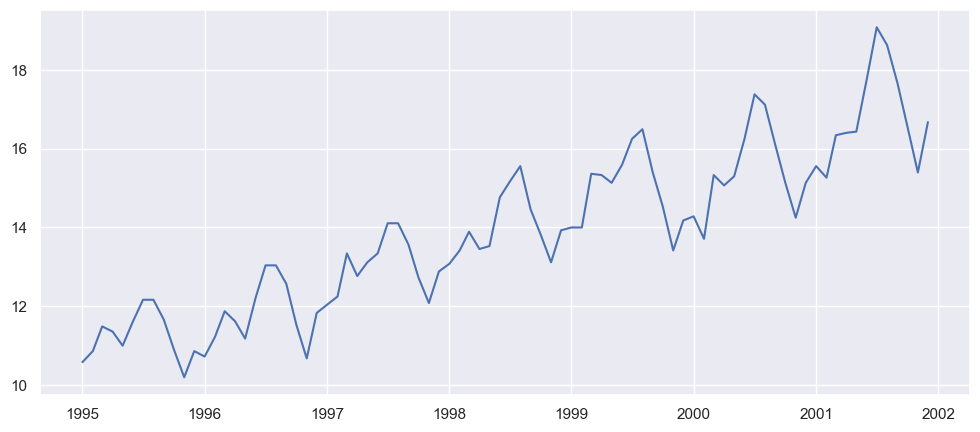

In [45]:
#Square root Transformation
data_sqrt = np.sqrt(data_train)
plt.figure(figsize=(12,5))
plt.plot(data_sqrt)

In [46]:
adf_test_4 = adfuller(data_sqrt)
print('p_value',adf_test_4[1])

p_value 0.9733947468921553


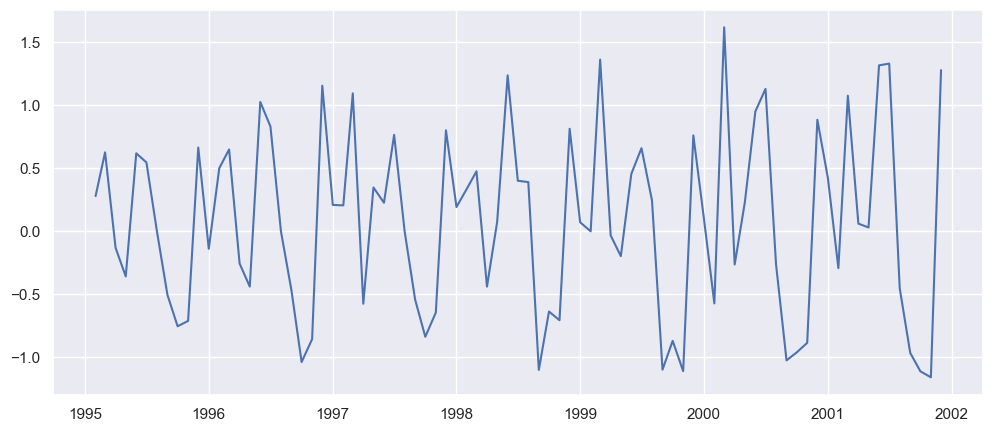

In [47]:
#Square root Transformation with differntiation
data_sqrt_diff = data_sqrt.diff().dropna()
plt.figure(figsize=(12,5))
plt.plot(data_sqrt_diff)

In [48]:
adf_test_5 = adfuller(data_sqrt_diff)
print('p_value',adf_test_5[1])

p_value 0.19316604317422365


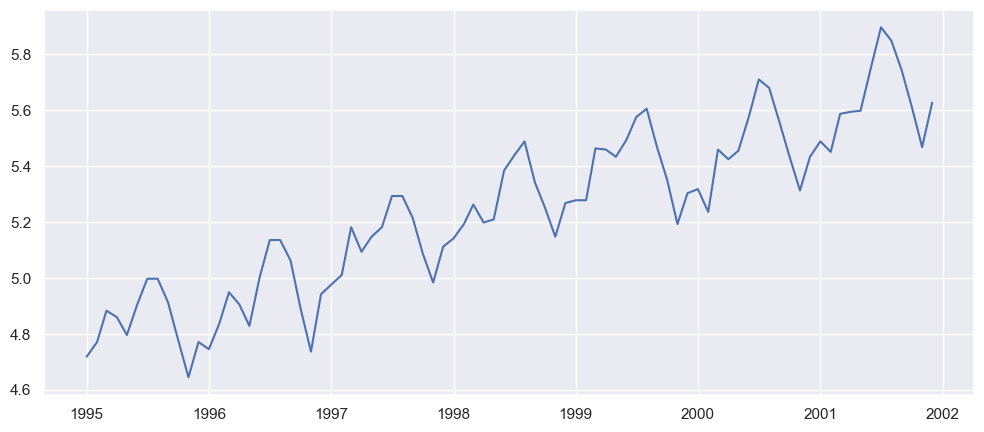

In [49]:
#log Transformation
data_log = np.log(data_train)
plt.figure(figsize=(12,5))
plt.plot(data_log)

In [50]:
adf_test_6 = adfuller(data_log)
print('p_value',adf_test_6[1])

p_value 0.849621504612667


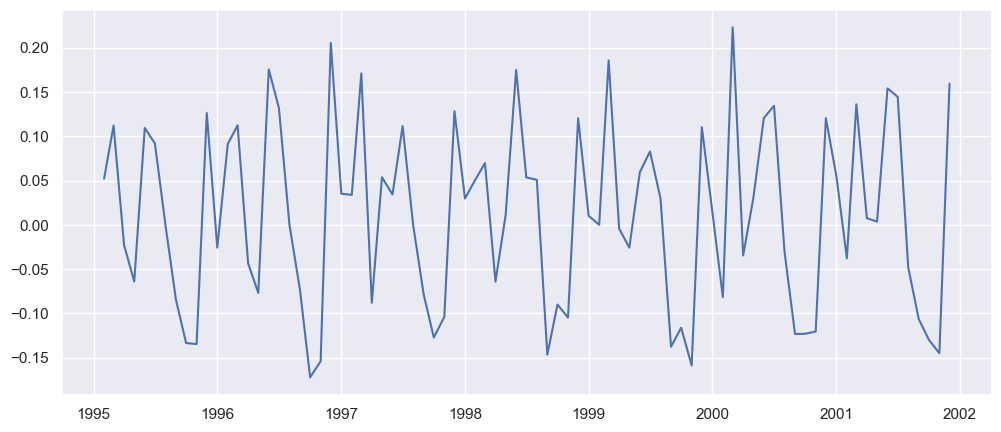

In [51]:
#log Transformation with differntiation
data_log_diff = data_log.diff().dropna()
plt.figure(figsize=(12,5))
plt.plot(data_log_diff)

In [52]:
adf_test_7 = adfuller(data_log_diff)
print('p_value',adf_test_7[1])

p_value 0.1421746085069306


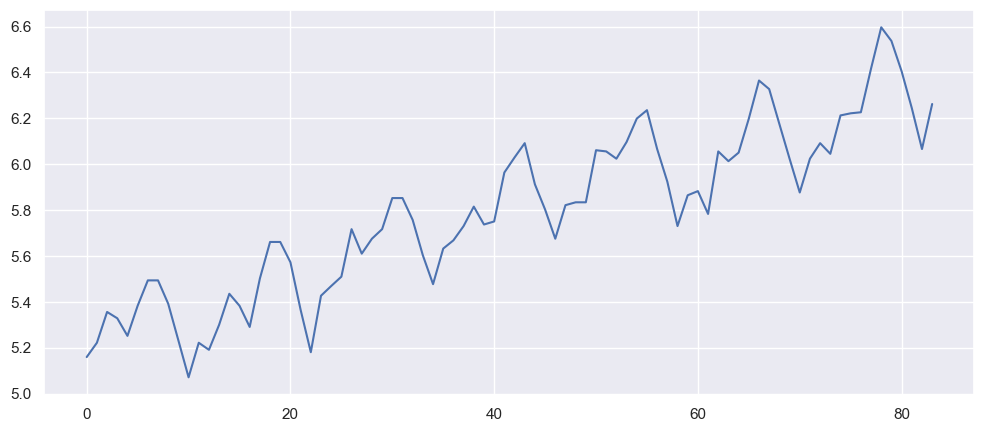

In [53]:
#boxcox Transformation
from scipy.stats import boxcox
data_bx = boxcox(data_train['P'])[0]
plt.figure(figsize=(12,5))
plt.plot(data_bx)

In [54]:
adf_test_8 = adfuller(data_bx)
print('p_value',adf_test_8[1])

p_value 0.8667688902947077


<b>Different Transformation techniques alone and also with differencing couldnt make the series stationary.<br>
<b>Lets choose the 'd' parameter in our ARIMA Model as 2 since second order differencing makes the train series stationary

D:\Anaconda\Installation\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


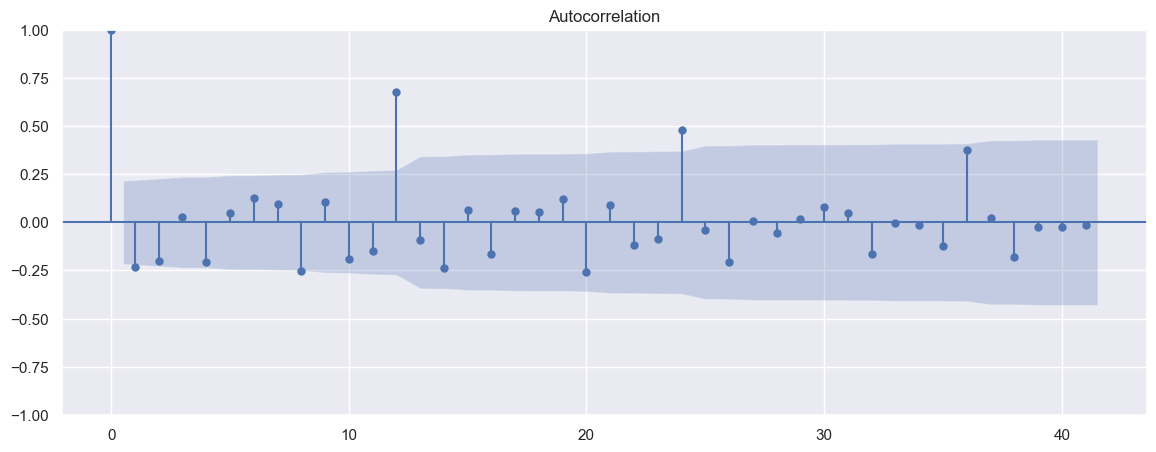

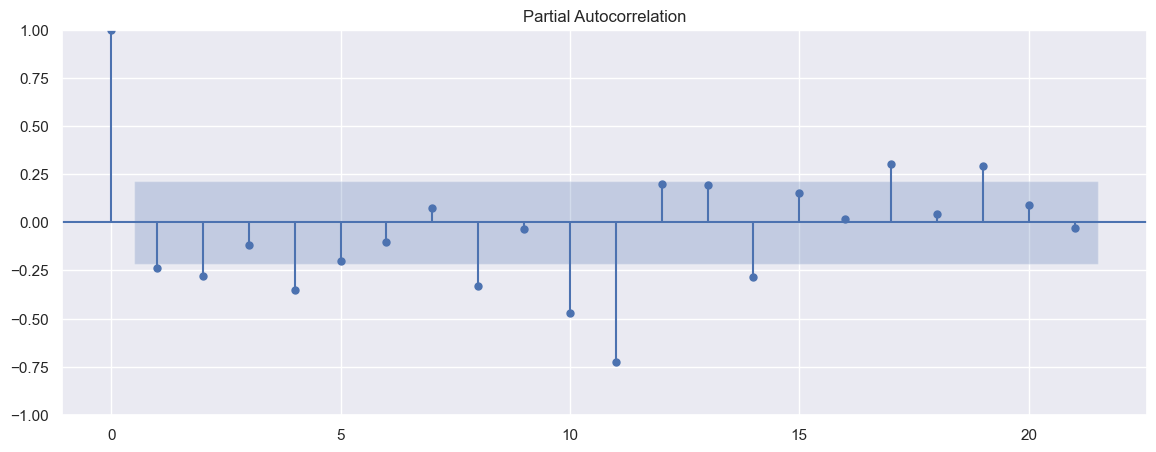

In [55]:
#Selection of p & q values for ARIMA Model from ACF and PCF plots (Rule of Thumb)
plt.rc('figure',figsize=(14,5))
tsa_plots.plot_acf(data_train_diff2,lags=41)
plt.rc('figure',figsize=(14,5))
tsa_plots.plot_pacf(data_train_diff2,lags=21)
plt.show()

<b>In ACF plot autocorrelation reduces after lag=1, Lets select p=1<br>
<b>In PACF plot partial autocorrelation reduces after lag=1, Lets select q=1

In [56]:
from statsmodels.tsa.arima.model import ARIMA as AR
model_7 = AR(data_train,order=(1,2,1)).fit()
pred_7 = model_7.forecast(12)
print(pred_7.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_7)),'\n','MAPE :',MAPE(data_test['P'],pred_7))

(12,)
RMSE : 51.745011620572896 
 MAPE : 10.645442605476662


D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


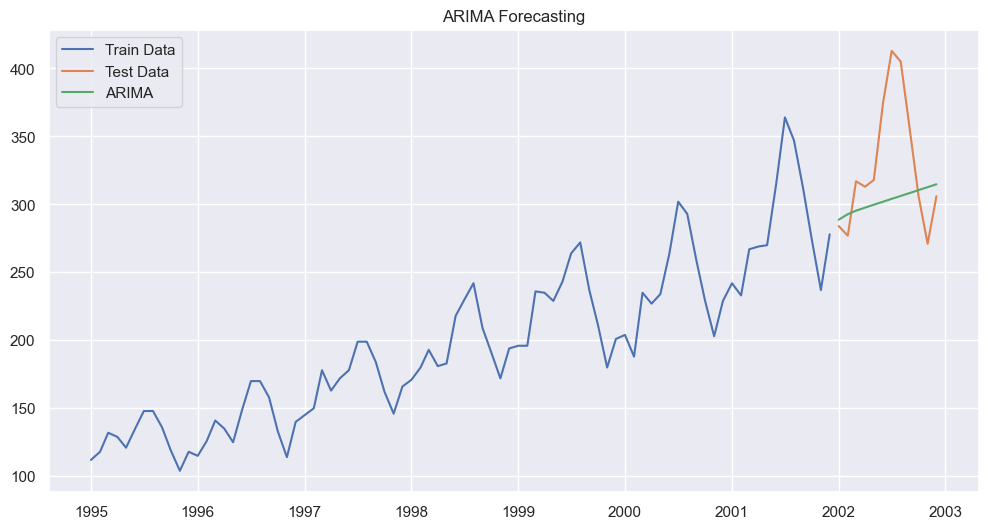

In [57]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_7,label='ARIMA')
plt.title('ARIMA Forecasting')
plt.legend(loc='best')
plt.show()

<b>SARIMA

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX as SR
model_8 = SR(data_train,order=(1,1,1),seasonal_order=(1,2,1,12)).fit()
pred_8 = model_8.forecast(12)
print(pred_8.shape)
print('RMSE :',np.sqrt(MSE(data_test,pred_8)),'\n','MAPE :',MAPE(data_test['P'],pred_8))

D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\Installation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(12,)
RMSE : 8.67889127460528 
 MAPE : 2.1949478137771083


D:\Anaconda\Installation\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


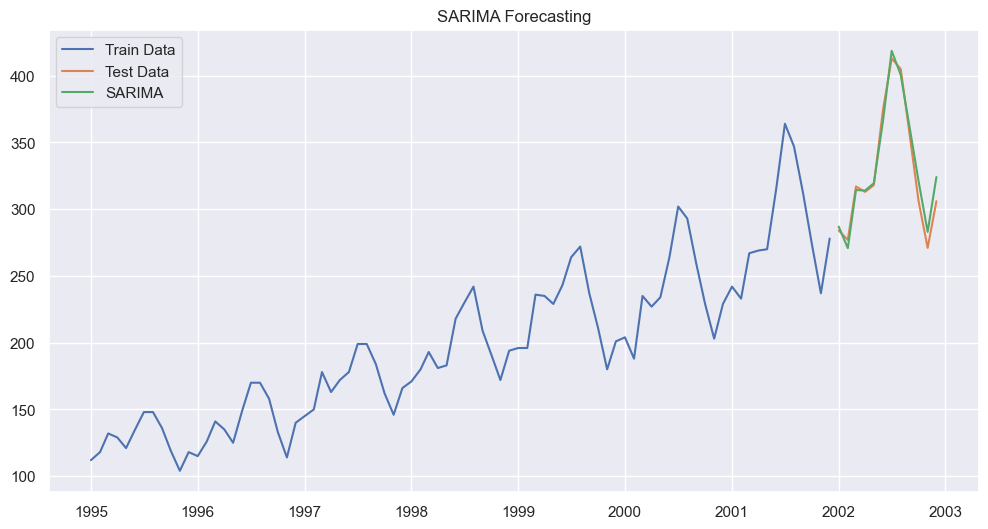

In [59]:
plt.figure(figsize=(12,6))
plt.plot(data_train,label='Train Data')
plt.plot(data_test,label='Test Data')
plt.plot(pred_8,label='SARIMA')
plt.title('SARIMA Forecasting')
plt.legend(loc='best')
plt.show()

<b>SARIMA performs better than ARIMA and catch the seasonality well

In [60]:
#Comparison of model performances
df_metric=pd.DataFrame({'Forecasting Model':['Simple Exponential','Holts','Holt-Winters1','Holt-Winters2','Holt-Winters3',
                                   'Holt-Winters4','ARIMA','SARIMA'],'RMSE':[np.sqrt(MSE(data_test['P'],pred_1)),
                                                                             np.sqrt(MSE(data_test['P'],pred_2)),
                                                                             np.sqrt(MSE(data_test['P'],pred_3)),
                                                                             np.sqrt(MSE(data_test['P'],pred_4)),
                                                                             np.sqrt(MSE(data_test['P'],pred_5)),
                                                                             np.sqrt(MSE(data_test['P'],pred_6)),
                                                                             np.sqrt(MSE(data_test['P'],pred_7)),
                                                                             np.sqrt(MSE(data_test['P'],pred_8))],
                        'MAPE':[MAPE(data_test['P'],pred_1),
                                MAPE(data_test['P'],pred_2),
                                MAPE(data_test['P'],pred_3),
                                MAPE(data_test['P'],pred_4),
                                MAPE(data_test['P'],pred_5),
                                MAPE(data_test['P'],pred_6),
                                MAPE(data_test['P'],pred_7),
                                MAPE(data_test['P'],pred_8)]})
                                                                
df_metric

,Forecasting Model,RMSE,MAPE
0,Simple Exponential,68.006740,14.235433
1,Holts,58.579717,11.840939
2,Holt-Winters1,29.589129,5.730287
3,Holt-Winters2,7.756772,1.939573
4,Holt-Winters3,26.061083,5.169219
5,Holt-Winters4,12.920910,2.821091
6,ARIMA,51.745012,10.645443
7,SARIMA,8.678891,2.194948


<b><h3>Model based Methods<br>
    
<b>Lets develope some ols forecasting models

In [61]:
#Data Preparations
air = pd.read_excel(r'D:\Excelr Data Science assignment\Forecasting\Airlines+Data.xlsx',sheet_name='Sheet1')

In [62]:
air.rename(columns = {'Month': 'Date','Passengers': 'P'},inplace=True)
air

,Date,P
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [63]:
air['t'] = np.arange(1,len(data)+1)
air['t_squared'] = np.square(air['t'])
air['Month'] = air['Date'].dt.strftime('%b')
air['Year'] = air['Date'].dt.strftime('%y')
air

,Date,P,t,t_squared,Month,Year
0,1995-01-01,112,1,1,Jan,95
1,1995-02-01,118,2,4,Feb,95
2,1995-03-01,132,3,9,Mar,95
3,1995-04-01,129,4,16,Apr,95
4,1995-05-01,121,5,25,May,95
...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,02
92,2002-09-01,355,93,8649,Sep,02
93,2002-10-01,306,94,8836,Oct,02
94,2002-11-01,271,95,9025,Nov,02


In [64]:
dummy = pd.get_dummies(air['Month'])
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
91,False,True,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,True
93,False,False,False,False,False,False,False,False,False,False,True,False
94,False,False,False,False,False,False,False,False,False,True,False,False


In [65]:
air_2 = pd.concat([air,dummy],axis=1)
air_2

,Date,P,t,t_squared,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1,1,Jan,95,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,2,4,Feb,95,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,3,9,Mar,95,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,4,16,Apr,95,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,5,25,May,95,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,02,False,True,False,False,False,False,False,False,False,False,False,False
92,2002-09-01,355,93,8649,Sep,02,False,False,False,False,False,False,False,False,False,False,False,True
93,2002-10-01,306,94,8836,Oct,02,False,False,False,False,False,False,False,False,False,False,True,False
94,2002-11-01,271,95,9025,Nov,02,False,False,False,False,False,False,False,False,False,True,False,False


In [66]:
air_2['Log_p'] = np.log(air_2['P'])
air_2

,Date,P,t,t_squared,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Log_p
0,1995-01-01,112,1,1,Jan,95,False,False,False,False,True,False,False,False,False,False,False,False,4.718499
1,1995-02-01,118,2,4,Feb,95,False,False,False,True,False,False,False,False,False,False,False,False,4.770685
2,1995-03-01,132,3,9,Mar,95,False,False,False,False,False,False,False,True,False,False,False,False,4.882802
3,1995-04-01,129,4,16,Apr,95,True,False,False,False,False,False,False,False,False,False,False,False,4.859812
4,1995-05-01,121,5,25,May,95,False,False,False,False,False,False,False,False,True,False,False,False,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,Aug,02,False,True,False,False,False,False,False,False,False,False,False,False,6.003887
92,2002-09-01,355,93,8649,Sep,02,False,False,False,False,False,False,False,False,False,False,False,True,5.872118
93,2002-10-01,306,94,8836,Oct,02,False,False,False,False,False,False,False,False,False,False,True,False,5.723585
94,2002-11-01,271,95,9025,Nov,02,False,False,False,False,False,False,False,False,False,True,False,False,5.602119


In [67]:
#Split Data
d_train = air_2[:84]
d_test = air_2[84:]

<b>OLS MODELS

In [68]:
import statsmodels.formula.api as smf

In [69]:
#1. Linear
model_linear = smf.ols('P~t',data=d_train).fit()
pred_linear =pd.Series(model_linear.predict(pd.DataFrame(d_test['t'])))
RMSE_linear = np.sqrt(np.mean((np.array(d_test['P'])-np.array(pred_linear))**2))
RMSE_linear

53.19923653480264

In [70]:
#2. Exponential
model_exp= smf.ols('Log_p~t',data=d_train).fit()
pred_exp = pd.Series(model_exp.predict(pd.DataFrame(d_test['t'])))
RMSE_exp = np.sqrt(np.mean((np.array(d_test['P'])-np.array(np.exp(pred_exp)))**2))
RMSE_exp

46.05736110315608

In [71]:
#3. Quadratic
model_quad= smf.ols('P~t+t_squared',data=d_train).fit()
pred_quad = pd.Series(model_quad.predict(pd.DataFrame(d_test[['t','t_squared']])))
RMSE_quad = np.sqrt(np.mean((np.array(d_test['P'])-np.array(np.array(pred_quad)))**2))
RMSE_quad

48.05188897933152

In [72]:
#4. Additive
model_add = smf.ols('P~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=d_train).fit()
pred_add =pd.Series(model_add.predict(pd.DataFrame(d_test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
RMSE_add = np.sqrt(np.mean((np.array(d_test['P'])-np.array(pred_add))**2))
RMSE_add

132.8197848142182

In [73]:
#5. Additive Quadratic
model_add_quad= smf.ols('P~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=d_train).fit()
pred_add_quad = pd.Series(model_add_quad.predict(d_test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
RMSE_add_quad= np.sqrt(np.mean((np.array(d_test['P'])-np.array(pred_add_quad))**2))
RMSE_add_quad

26.36081761213207

In [74]:
#6. Multiplicative
model_mul= smf.ols('Log_p~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = d_train).fit()
pred_mul = pd.Series(model_mul.predict(d_test))
RMSE_mul = np.sqrt(np.mean((np.array(d_test['P'])-np.array(np.exp(pred_mul)))**2))
RMSE_mul

140.06320204708683

In [75]:
#6. Multiplicative Additive
model_mul_add = smf.ols('Log_p~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = d_train).fit()
pred_mul_add = pd.Series(model_mul_add.predict(d_test))
rmse_mul_add = np.sqrt(np.mean((np.array(d_test['P'])-np.array(np.exp(pred_mul_add)))**2))
rmse_mul_add

10.519172544322444

In [76]:
MAPE_OLS=MAPE(np.exp(pred_mul_add),d_test.P)
print('MAPE_OLS = ',MAPE(np.exp(pred_mul_add),d_test.P))

MAPE_OLS =  2.4187475026051195


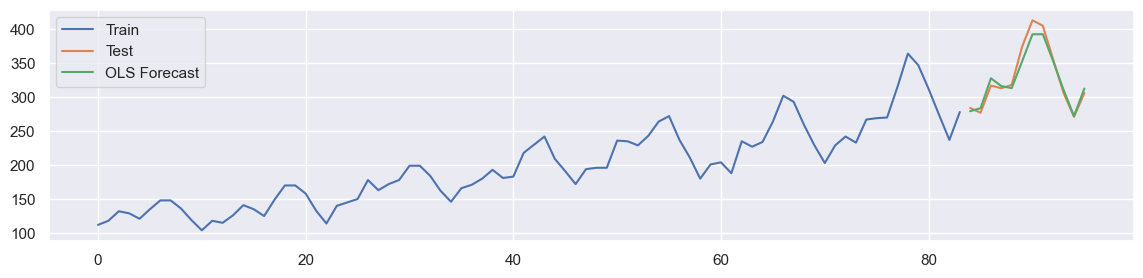

In [77]:
plt.figure(figsize=(14,3))
plt.plot(d_train['P'], label='Train')
plt.plot(d_test['P'], label='Test')
plt.plot(np.exp(pred_mul_add), label='OLS Forecast')
plt.legend(loc='best')
plt.show()

<b>This model catches seasonality and trend very well

<b>Comparison of Impressed Models

<b>Out of several models we have<br>
<b>1.Model_4(seasonality=multiplicative,trend= multiplicative)<br>
<b>2.Model_6(seasonality=multiplicative,trend=additive)<br>
<b>3.SARIMA,and<br>
<b>4.OLS model(multiplicative-additive) performing better than others. Lets compare these

In [78]:
metric=pd.DataFrame({'Forecasting Model':['Holt-Winters2','Holt-Winters4','SARIMA','OLS_mul_add'],
                     'RMSE':[np.sqrt(MSE(data_test['P'],pred_4)),np.sqrt(MSE(data_test['P'],pred_6)),
                             np.sqrt(MSE(data_test['P'],pred_8)),rmse_mul_add],
                    'MAPE':[MAPE(data_test['P'],pred_4),MAPE(data_test['P'],pred_6),MAPE(data_test['P'],pred_8),MAPE_OLS]})
metric


,Forecasting Model,RMSE,MAPE
0,Holt-Winters2,7.756772,1.939573
1,Holt-Winters4,12.920910,2.821091
2,SARIMA,8.678891,2.194948
3,OLS_mul_add,10.519173,2.418748


In [79]:
#change index of the ols model
ols=np.exp(pred_mul_add)
ols=pd.Series(ols.values,index=pred_4.index,)
ols.head()

2002-01-01    279.259237
2002-02-01    283.647937
2002-03-01    327.699745
2002-04-01    316.197279
2002-05-01    313.139118
Freq: MS, dtype: float64

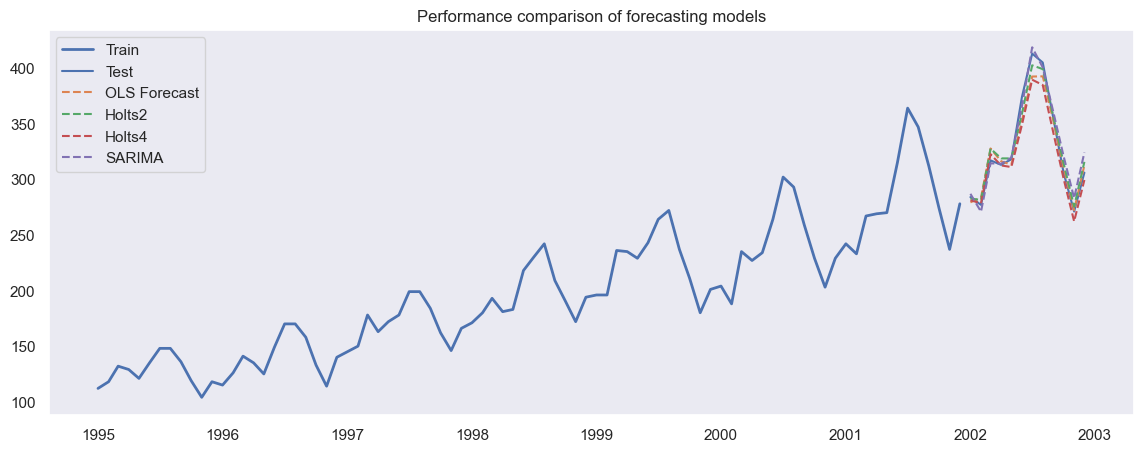

In [80]:
plt.figure(figsize=(14,5))
plt.grid()
plt.plot(data_train['P'], label='Train',lw=2)
plt.plot(data_test['P'], label='Test',color='b')
plt.plot(ols, label='OLS Forecast',ls='--')
plt.plot(pred_4, label='Holts2',ls='--')
plt.plot(pred_6, label='Holts4',ls='--')
plt.plot(pred_8, label='SARIMA',ls='--')
plt.title('Performance comparison of forecasting models')
plt.legend(loc='best')
plt.show()

<b>Summary

<b>By comparing RMSE and MAPE ,Holt-Winters Model(seasonality='multiplicative',trend='multiplicative') and OLS Model(Multiplicative-Additive) are chosen as best models in which Holt-Winter model with RMSE=7.95 and MAPE=1.93 can be considered as the forecasting model for our problem statement.